## Categories 
* **Supervised**
    * modeling relationship between measured features of data and some label associated w/the date
    * Once model determined, can be used to apply labels to new, unknown data
    * Further subdivided into classification tasks and regressions tasks
        * `Classification` - labels are discrete categories
        * `Regression` - labels are continuous quantities
* **Unsupervised**
    * modeling the features of a dataset w/o reference to any label
    * "let the dataset speak for itself"
    * Models Include tasks such as `clustering` and `dimensionality reduction`
        * clustering algorithm identify distinct groups of data
        * dimensionality reduction algorithms search for more succing representations of data
* **Semi-supervised**
    * Useful when only incomplete lables are available 

### Classification: Predicting discrete labels 
* Simple classification task in which you are give a set of labeled points and want to use these to classify some unlabeled points

In [1]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

(-1.0, 4.0, -2.0, 7.0)

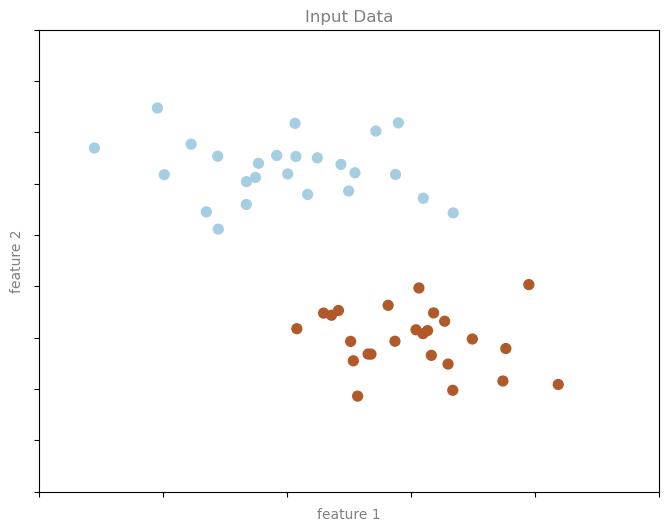

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)


# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

* Here is a two-dimensional data (two features for each point)
* We have on of two class labels for each poiont, represent by the colors of the points
* From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled **blue** or **red**

### Regression: Predicting Continuous Labels
* Labels are Continuous quantities

(-4.0, 4.0, -3.0, 3.0)

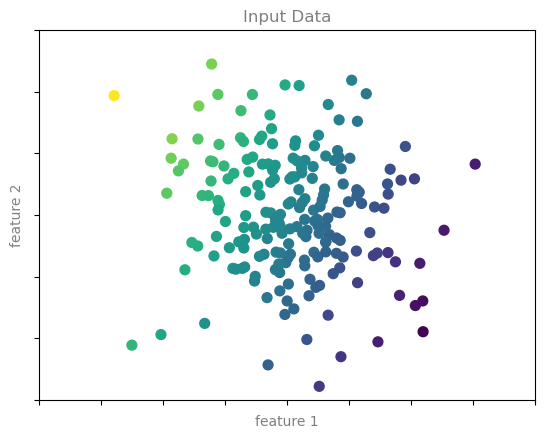

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

* Color of each point represents the continuous label for that point

(-4.0, 4.0, -3.0, 3.0)

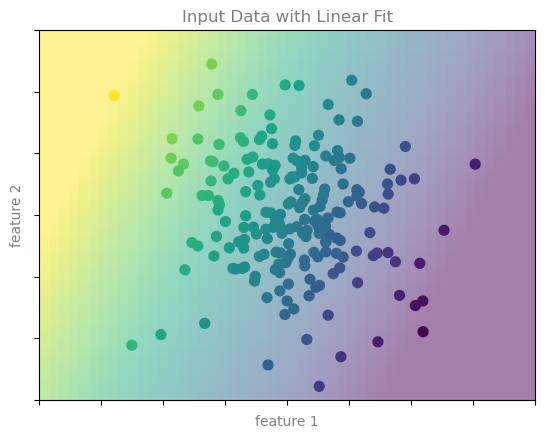

In [4]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

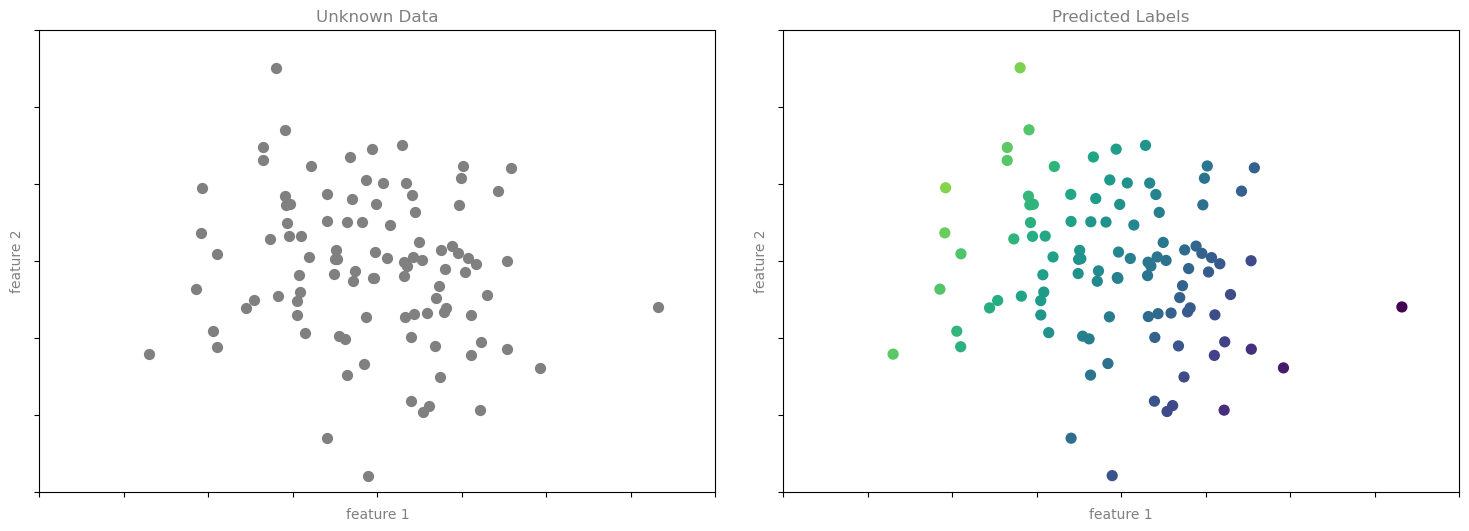

In [5]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

### Clustering: Inferring labels on unlabeled data
Above examples of a classification and regression illustration are examples of supervised learning algorithms. (Aka  building a model that will predict labels for new data)
* **Unsupervised learning** involves models that desccribe data with-out reference to any known labels
* A common case is "clustering" in which data is automatically assigned to some number of discrete groups

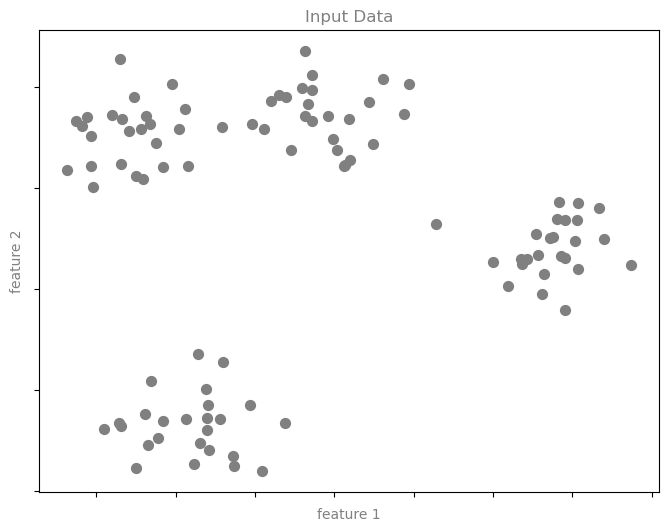

In [6]:
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

* By eye, it is clear that each of these points is part of a distinct group
* With **K-Means** algorithm, we find the cluster by fitting a model consisting of `k` cluster centers
    * the optimal centeres are assumed to be those that minimize the distnace of each point from its assigned center

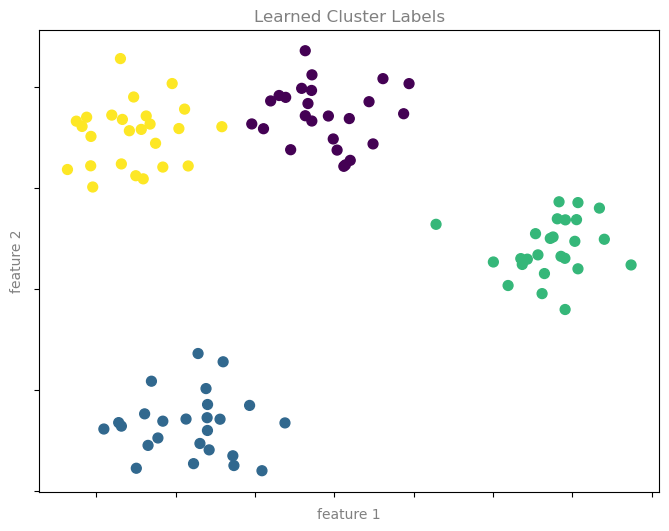

In [7]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

### Dimensionality redution: Inferring structure of unlabeled data
* It seeks to pull out low-dimensional representation of data that in some way preserves relevant qualities of the full dataset

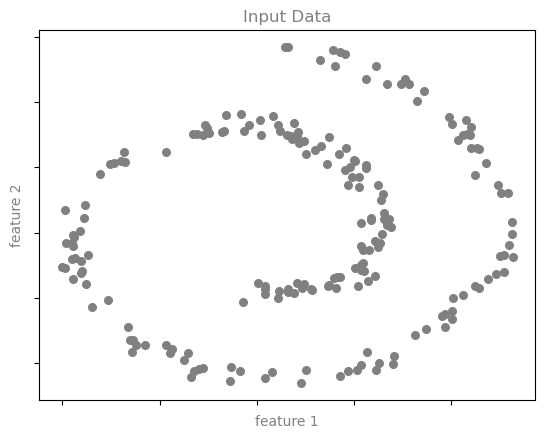

In [8]:
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data')


* Visually, it is clear that there is some structure in this data.
* In a sense, you could say that this data is "intrinsically" only one dimensional
* A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embeddeds tructure, and be able to pull out this lower-dimensionality representation

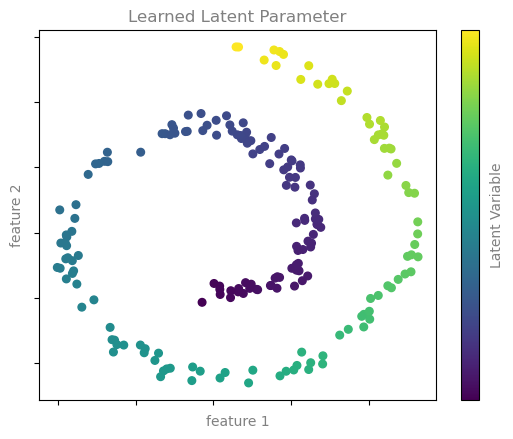

In [9]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

* Notice that the colors (represent the extracted one-dimensional latent variable) change uniformly along the spiral indicating the model/algorithm did in fact detect the structure we saw by eye
* The **power of dimensionality** becomes clearer in high-dimensional cases
    * Example 
    * We might wish to visualize important relationship within a dataset that has 100 or 1,000 features
    * Trying to visualize this many features is beyond challenging, we can make this more manageable by using a dimensionality reduction technique to reduce the data to two or three dimensions
    
<br>
    
#### Quick Summary 
* `Supervised Learning` : models that can predict labels based on labeled training data
* `Classification` : models that predict labels as two or more discrete categories
* `Regression` : models that predict continuous labels
* `Unsupervised Learning` : models that identify structure in **unlabeled data**
* `Clustering` : Models that detect and identify distinct groups in data
* `Dimensionality reduction` : models that detect and identify lower-dimensional structre in higher-dimensional data